In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=5)
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8790 - loss: 0.4132 - val_accuracy: 0.9593 - val_loss: 0.1293
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9676 - loss: 0.1070 - val_accuracy: 0.9723 - val_loss: 0.0969
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9786 - loss: 0.0694 - val_accuracy: 0.9731 - val_loss: 0.0889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9851 - loss: 0.0475 - val_accuracy: 0.9732 - val_loss: 0.0954
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9877 - loss: 0.0400 - val_accuracy: 0.9748 - val_loss: 0.0882
313/313 - 1s - 2ms/step - accuracy: 0.9748 - loss: 0.0882

Test accuracy: 0.9747999906539917


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1035
Validation Accuracy: 97.48%


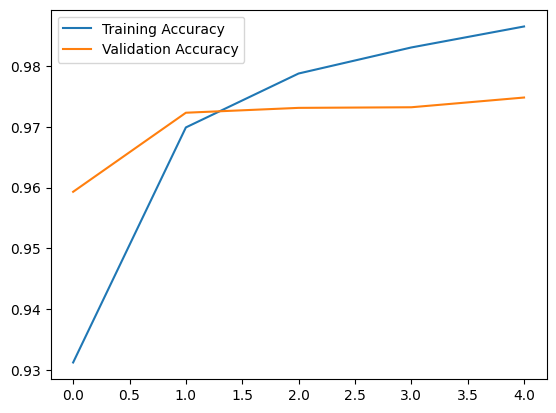

In [3]:
#Evaluate the model
import matplotlib.pyplot as plt

val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


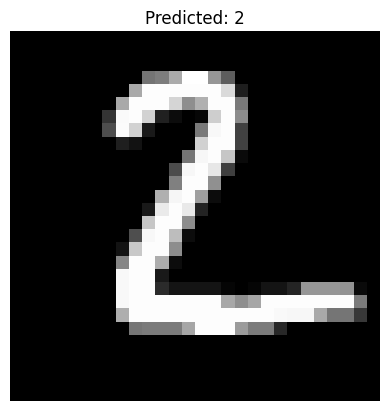

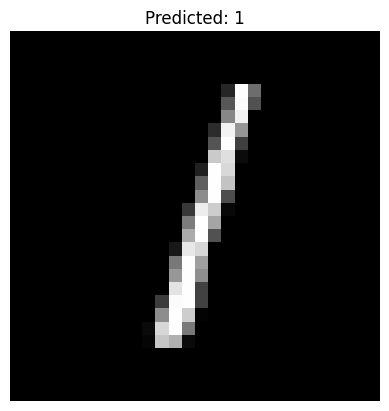

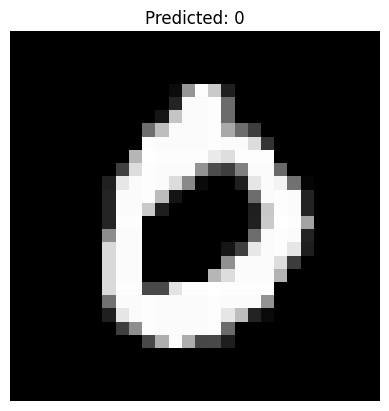

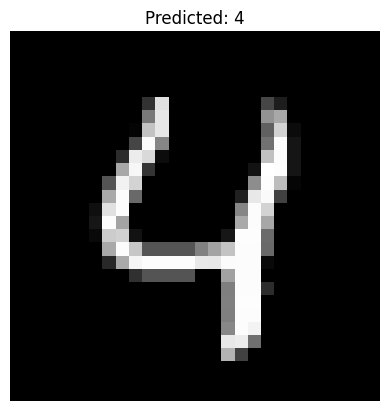

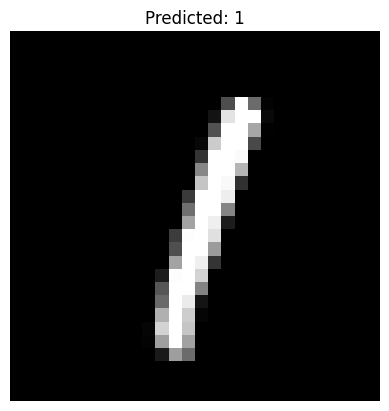

In [4]:
#prediction
import numpy as np
import pandas as pd
test_data = pd.read_csv('/content/sample_data/mnist_test.csv')
# Exclude the first column (labels) before reshaping
X_test_images = test_data.iloc[:, 1:].values / 255.0
X_test_images = X_test_images.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test_images)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()